<a href="https://colab.research.google.com/github/Abhinavsarva/Project-Aerofit/blob/main/Aerofit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")

In [ ]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [ ]:
df.isnull()
df.sum()

,0
Product,KP281KP281KP281KP281KP281KP281KP281KP281KP281K...
Age,5182
Gender,MaleMaleFemaleMaleMaleFemaleFemaleMaleMaleFema...
Education,2803
MaritalStatus,SingleSinglePartneredSinglePartneredPartneredP...
Usage,622
Fitness,596
Income,9669524
Miles,18575


univarite analysis
conitnuous (age, income, fitness, miles, uasge)

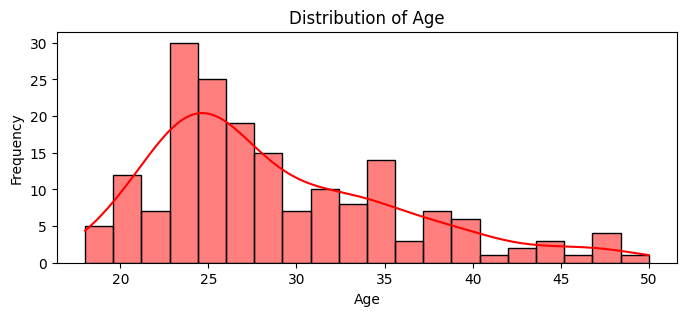

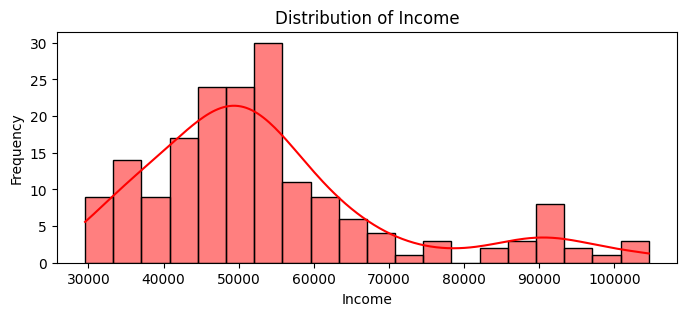

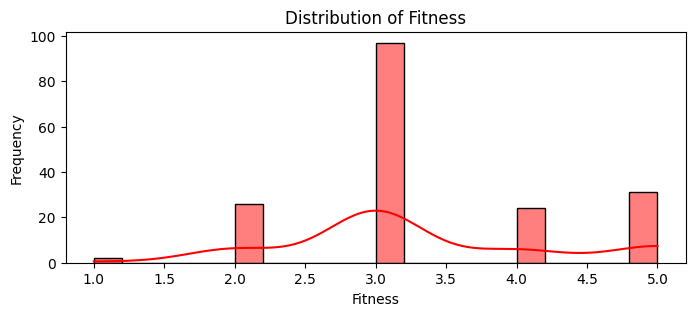

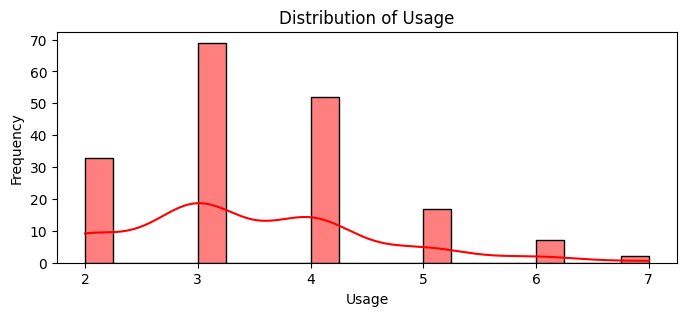

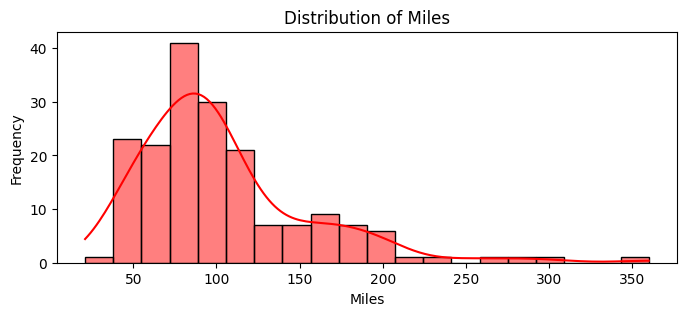

In [ ]:
# Distribution plots for continuous variables
numerical_columns = ['Age', 'Income', 'Fitness', 'Usage', 'Miles']

for col in numerical_columns:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[col], kde=True, bins=20, color='red')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')


Bivarite analysis
Relationship and other (gender, marital, status)

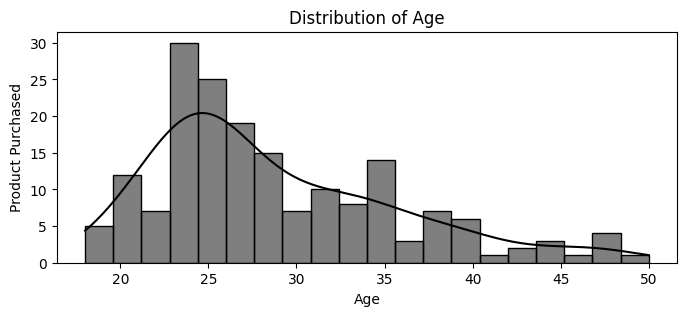

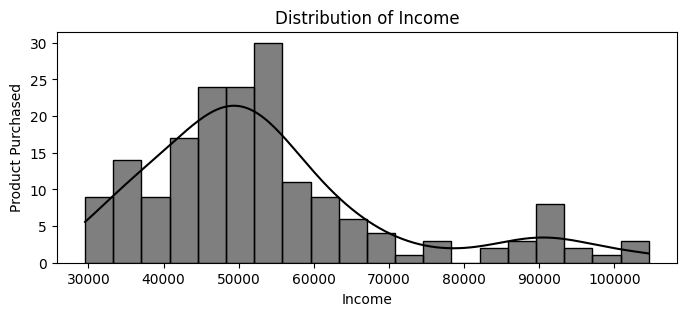

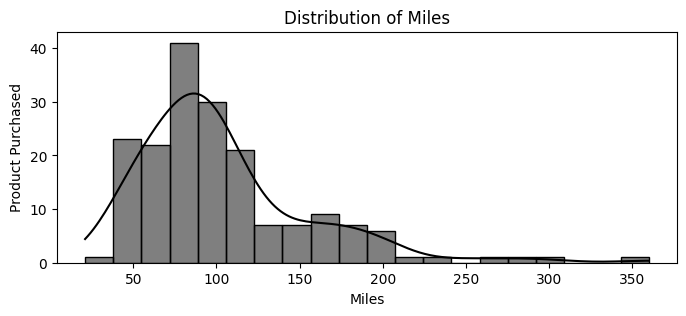

In [ ]:
relation_col = ['Age', 'Income', 'Miles']

for col in relation_col:
    plt.figure(figsize=(8, 3))
    sns.histplot(df[col], kde=True, bins=20, color='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Product Purchased')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1615: UserWarning: Ignoring `palette` because no `hue` variable h

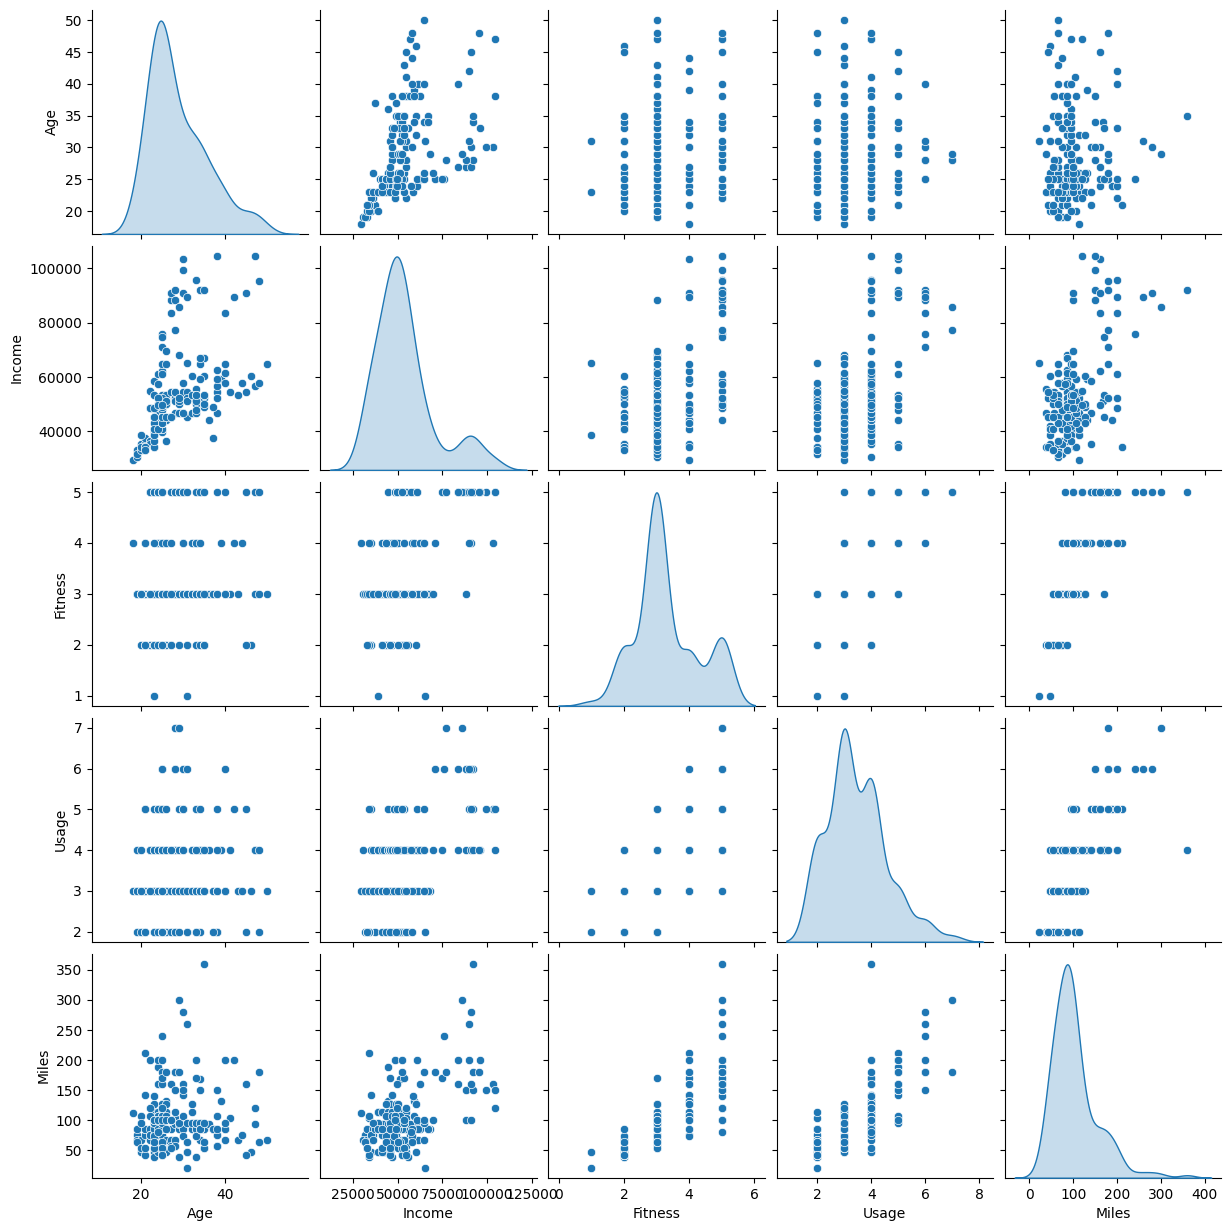

In [ ]:
# Pairplot for numerical features
sns.pairplot(df[['Age', 'Income', 'Fitness', 'Usage', 'Miles']], diag_kind='kde', palette='husl')



<Axes: xlabel='Gender', ylabel='Income'>

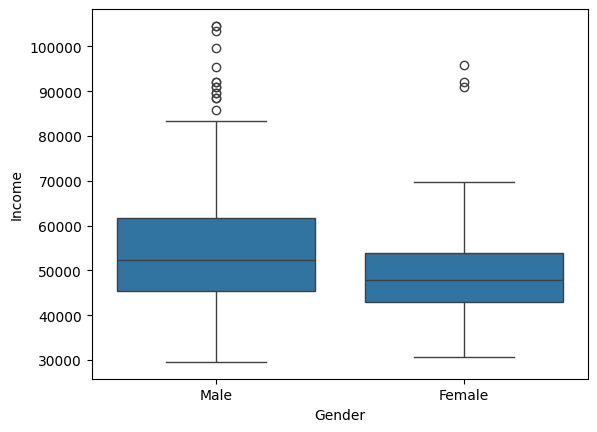

In [ ]:
sns.boxplot(x='Gender', y='Income', data=df)

Outlier Detection



In [ ]:
# Detecting potential outliers using IQR
for col in numerical_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers in {col}: {len(outliers)}")


Outliers in Age: 5
Outliers in Income: 19
Outliers in Fitness: 2
Outliers in Usage: 9
Outliers in Miles: 13


Missing Value & Outlier Detection

In [ ]:
missing_values = df.isnull().sum()
missing_values



,0
Product,0
Age,0
Gender,0
Education,0
MaritalStatus,0
Usage,0
Fitness,0
Income,0
Miles,0


In [ ]:
df.shape

(180, 9)